# Hypercycle
Manfred Eigen's Hypercycle modelled in a ball-game. The winner-colour takes it all and is the only survivor. Cycle breaks sooner or later with only having one survivor colour.

Game starts with a fix number of colours which are randomly equally-distributed on a two-dimensional grid. A playing_move implies subsituting a colour with another colour according the set-up-rule. According to that rule only one colour survives. How many games resp. playing_moves need to be played until one colour reaches 100% depends on the grid dimensions and on the number of colours (and on the set-up-rule) 

 - Part 3: Play the game until one colour "takes it all" on a 10x10 grid having six colours initially. and plot colour-path in a line plot and the playground evolution in 16-steps.
 - Part 4: Simulate "One-Colour-takes-it-all distribution"
 - Part 5: Line-plot animation and Playing-ground animation
 
Further links:
 - [**The-Hypercycle-Part-A**](https://unterlagen.site/document/eigen1977naturwissenschaften64.html)
 - [**The-Hypercycle-Part-B**](https://web.archive.org/web/20160303203325/http://jaguar.biologie.hu-berlin.de/~wolfram/pages/seminar_theoretische_biologie_2007/literatur/schaber/Eigen1978Naturwissenschaften65a.pdf)
 - [**The-Hypercycle-Part-C**](https://web.archive.org/web/20160616180402/http://jaguar.biologie.hu-berlin.de/~wolfram/pages/seminar_theoretische_biologie_2007/literatur/schaber/Eigen1978Naturwissenschaften65b.pdf)

# Imports & object creation

In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sys.path.insert(0, 'lib\\')
import Hypercycle

## Hypercycle object creation

In [18]:
number_of_colours = 5
grid_dimension_1  = 10
grid_dimension_2  = 10

In [19]:
# create my hypercycle object
myHypercycle = Hypercycle.Hypercycle(number_of_colours, grid_dimension_1, grid_dimension_2)

Constructor called with 5 colours by 10 x 10 field.


myHypercycle object allows to simulate and display the Hypercycle game accoring the given parameters resp. set-up.

# Play, Simulate and Plot Hypercycle

In [126]:
myHypercycle.play()

Play until one colour has reached 100% coverage or max. 10000 rounds per default.

## Plot colour-path in a line plot

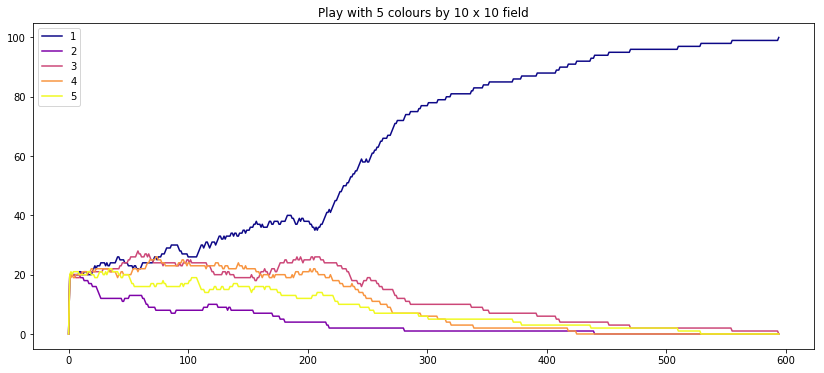

In [139]:
myHypercycle.plot_colours_count_path()

Colour 1 gained the preponderance after 100 played games, from there on colour 1 increased their share, which is not monotonically increasing, but sooner or later all the other colours bit the dust.

## Plot playground evolution in 16-steps

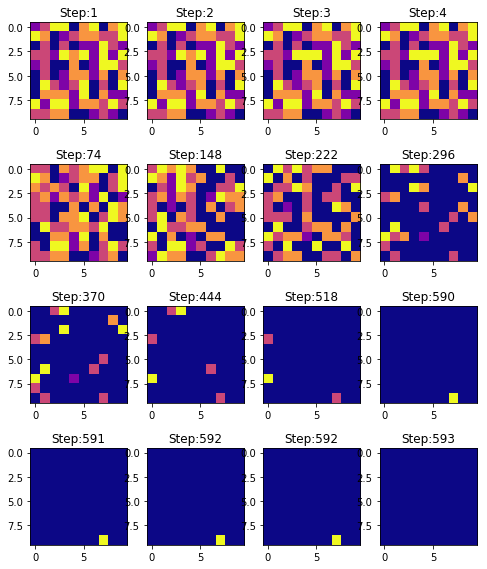

In [140]:
myHypercycle.plot_playing_ground_sequence()

Progress shown in the actual playground, which is a 10x10 field, after 593 games played colour 1 'took it all'

# One-Colour-takes-it-all distribution
How many expected games does it take till only one colour is left?

In [58]:
# simulation of how many games were necessary to have only one survivor colour 
container = []

for i in range(1, 1000):
    print(i)
    myHypercycle = Hypercycle.Hypercycle(5, 10, 10)
    myHypercycle.play()
    container.append(len(myHypercycle.get_colours_count_df()))
    del myHypercycle    

                 0
count   999.000000
mean    841.641642
std     262.395416
min     416.000000
25%     653.000000
50%     790.000000
75%     972.000000
max    2141.000000


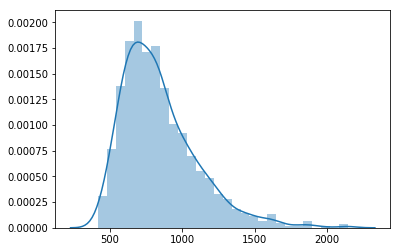

In [57]:
print(pd.DataFrame(container).describe())
sns.distplot(pd.DataFrame(container))

on average it took about 840 games till 'one colour took it all',
the distribuion is right-skewed due to some long-lasting outlier-sessions,   
the median is at 790 games' played meaning 50% of all simlulated sessions ended with or before the 790th played' game   

# Plot animation

## Line plot animation

In [ ]:
del myHypercycle

In [ ]:
#%matplotlib qt

In [16]:
#--- Line animation 
# https://holypython.com/python-visualization-tutorial/guide-to-python-animations-animating-multiple-lines/
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from itertools import count
xval= count(0,3)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))
axes.set_ylim(0, 100)
axes.set_xlim(0, 1000)
plt.style.use("ggplot")

# --> Object creation
myHypercycle = Hypercycle.Hypercycle(3,10,10)

myHypercycle.initialize_playing_ground()

x1,y1,y2,y3 = [], [], [], []
xval= count(0,3)
def animate(i):
    x1.append(next(xval))
    myHypercycle.playing_move()
    l = myHypercycle.get_colours_count()    
    y1.append((l[0]))
    y2.append((l[1]))
    y3.append((l[2]))

    axes.plot(x1,y1, color="red")
    axes.plot(x1,y2, color="gray", linewidth=0.5)
    axes.plot(x1,y3, color="blue")
    
anim = FuncAnimation(fig, animate, interval=1)


Constructor called with 3 colours by 10 x 10 field.
Destructor called.


## Playing ground / matrix plot animation

In [ ]:
del myHypercycle

In [ ]:
#%matplotlib qt

In [13]:
#--- Matrix animation 
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

myHypercycle = Hypercycle.Hypercycle(3,10,10)
myHypercycle.initialize_playing_ground()
M = myHypercycle.get_playing_ground()

def update(i):
    myHypercycle.playing_move()
    M = myHypercycle.get_playing_ground()
    matrice.set_array(M)

fig, ax = plt.subplots()
matrice = ax.matshow(M)
#plt.title()

ani = animation.FuncAnimation(fig, update, frames=100, interval=1)
plt.show()


Constructor called with 3 colours by 10 x 10 field.
